### 几个发现

- bitmex似乎只能查到最近几天的交易和委托历史。在10月27日下午18点登录网页查看，只能查到10月22日以来的交易记录和委托记录
- textnet测试发现，已撤单的订单在大约10分钟之后会消失，网页端和REST-API(/execution)都查不到了。
- 实盘成交价格可能会超出REST-API查询的历史k线范围。已用实盘交易记录验证（自营账户10月24日4笔买单）

In [1]:
import datetime

report_days = 10   # 最近5天的报告

report_from = datetime.datetime.now() - datetime.timedelta(days=report_days) 
startTime = datetime.datetime.strftime(report_from, '%Y-%m-%d') # '2018-10-20'
endTime = None
symbol = 'XBTUSD'
bar_type = '1h'

account_settings_file = '../bitmex/BITMEX_connect.json'
which = 'real_trading_ZHOU'  #'account_test'

In [2]:
import sys
sys.path.append("../")

from bitmex.bitmexREST import bitmexREST
from bitmex.bitmexAccountSettings import bitmexAccountSettings

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",101)

In [3]:
acc = bitmexAccountSettings()
acc.from_config_file(account_settings_file, which)

In [4]:
rest = bitmexREST(apiKey=acc.apiKey, apiSecret=acc.apiSecret, isTestNet=acc.isTestNet)

In [5]:
# execution

execution_result = rest.query_history_execution(symbol, startTime, endTime)
df_exec = pd.DataFrame(execution_result)
df_exec['DATETIME'] = pd.to_datetime(df_exec['transactTime'])
df_exec.head()

,account,avgPx,clOrdID,clOrdLinkID,commission,contingencyType,cumQty,currency,displayQty,exDestination,execComm,execCost,execID,execInst,execType,foreignNotional,homeNotional,lastLiquidityInd,lastMkt,lastPx,lastQty,leavesQty,multiLegReportingType,ordRejReason,ordStatus,ordType,orderID,orderQty,pegOffsetValue,pegPriceType,price,settlCurrency,side,simpleCumQty,simpleLeavesQty,simpleOrderQty,stopPx,symbol,text,timeInForce,timestamp,tradePublishIndicator,transactTime,trdMatchID,triggered,underlyingLastPx,workingIndicator,DATETIME
0,624299,6348.12,,,-0.00010,,43430,USD,None,XBME,-68415,684152790,e9b285fa-52ce-dfd2-c316-c87a9ba7fc52,,Funding,43430,-6.841528,,XBME,6348.12,43430,0,SingleSecurity,,Filled,Limit,00000000-0000-0000-0000-000000000000,43430,None,,6348.12,XBt,,None,None,None,None,XBTUSD,Funding,AtTheClose,2018-11-11T04:00:00.005Z,,2018-11-11T04:00:00.000Z,9927cfb4-e94b-f210-b079-4179d93b3855,,None,False,2018-11-11 04:00:00.000
1,624299,6341.24,,,-0.00010,,43430,USD,None,XBME,-68489,684891100,78295a33-2cd5-7ff0-23b1-0e317c276886,,Funding,43430,-6.848911,,XBME,6341.24,43430,0,SingleSecurity,,Filled,Limit,00000000-0000-0000-0000-000000000000,43430,None,,6341.24,XBt,,None,None,None,None,XBTUSD,Funding,AtTheClose,2018-11-11T12:00:00.858Z,,2018-11-11T12:00:00.000Z,4b6670c5-f8b2-c766-98d9-ff86a7c09108,,None,False,2018-11-11 12:00:00.000
2,624299,6314.00,,,0.00075,,376,USD,None,XBME,4466,5955088,7f41b1c1-0e67-7b29-5d1a-b6a05ec70c62,,Trade,376,-0.059551,RemovedLiquidity,XBME,6314.00,376,5160,SingleSecurity,,PartiallyFilled,Limit,87f837dc-0399-9164-32e7-b24ba615bd64,5536,None,,6294.00,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T15:39:45.469Z,PublishTrade,2018-11-11T15:39:45.469Z,cd4d9c1d-30a0-6b0c-5e44-97585f3df04c,,None,True,2018-11-11 15:39:45.469
3,624299,6314.00,,,0.00075,,682,USD,None,XBME,3634,4846428,b3bc065f-7106-8f7f-241d-41f705f59d41,,Trade,306,-0.048464,RemovedLiquidity,XBME,6314.00,306,4854,SingleSecurity,,PartiallyFilled,Limit,87f837dc-0399-9164-32e7-b24ba615bd64,5536,None,,6294.00,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T15:39:45.469Z,PublishTrade,2018-11-11T15:39:45.469Z,773a69c0-0be0-7726-7e15-5923e96834a5,,None,True,2018-11-11 15:39:45.469
4,624299,6314.00,,,0.00075,,821,USD,None,XBME,1651,2201482,11d23ef0-f971-7af4-82ed-8f6dede390e9,,Trade,139,-0.022015,RemovedLiquidity,XBME,6314.00,139,4715,SingleSecurity,,PartiallyFilled,Limit,87f837dc-0399-9164-32e7-b24ba615bd64,5536,None,,6294.00,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T15:39:45.469Z,PublishTrade,2018-11-11T15:39:45.469Z,b7844416-00a0-15bf-7324-2c3ce201d6d9,,None,True,2018-11-11 15:39:45.469


In [6]:
all(df_exec.transactTime <= df_exec.timestamp)  # True

True

In [7]:
# order

order_result = rest.query_history_order(symbol, startTime, endTime)
df_order = pd.DataFrame(order_result)
df_order['DATETIME'] = pd.to_datetime(df_exec['transactTime'])
df_order   # side, price, DATETIME

,account,avgPx,clOrdID,clOrdLinkID,contingencyType,cumQty,currency,displayQty,exDestination,execInst,leavesQty,multiLegReportingType,ordRejReason,ordStatus,ordType,orderID,orderQty,pegOffsetValue,pegPriceType,price,settlCurrency,side,simpleCumQty,simpleLeavesQty,simpleOrderQty,stopPx,symbol,text,timeInForce,timestamp,transactTime,triggered,workingIndicator,DATETIME
0,624299,6314.0000,,,,5536,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,87f837dc-0399-9164-32e7-b24ba615bd64,5536,None,,6294.0,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T15:39:45.469Z,2018-11-11T15:39:45.469Z,,False,2018-11-11 04:00:00.000
1,624299,6280.0000,,,,153,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,0d0e3e62-b90f-6374-ac83-06a411321de8,153,None,,6262.0,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T15:41:48.079Z,2018-11-11T15:41:48.079Z,,False,2018-11-11 12:00:00.000
2,624299,6280.0000,,,,5000,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,e01c5afc-ac4a-4626-ae65-10a1e26e2725,5000,None,,6260.0,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T15:41:49.726Z,2018-11-11T15:41:49.726Z,,False,2018-11-11 15:39:45.469
3,624299,6283.0000,,,,9077,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,ecda70c7-ae35-b4dd-8196-549f0e5d8416,9077,None,,6257.0,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T15:41:52.916Z,2018-11-11T15:41:52.916Z,,False,2018-11-11 15:39:45.469
4,624299,6373.5000,,,,48544,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,58f7df30-be81-73d2-4fc3-bc1c52c6d3ff,48544,None,,6394.5,XBt,Buy,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-11T23:48:49.272Z,2018-11-11T23:48:49.272Z,,False,2018-11-11 15:39:45.469
5,624299,6404.5000,,,,3044,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,2d009045-5d6a-ebe6-1cab-a00df63de318,3044,None,,6418.0,XBt,Buy,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-12T00:01:18.870Z,2018-11-12T00:01:18.870Z,,False,2018-11-11 15:39:45.469
6,624299,6277.0699,,,,51588,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,0bd3b108-7a0e-6f31-171c-6ebb2a1500dc,51588,None,,6256.0,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-13T02:00:57.026Z,2018-11-13T02:00:57.026Z,,False,2018-11-11 15:41:48.079
7,624299,6249.0000,,,,1449,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,d5f92e14-6453-3172-deab-7b714780ddfb,1449,None,,6229.0,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-13T23:13:43.613Z,2018-11-13T23:13:43.613Z,,False,2018-11-11 15:41:49.726
8,624299,6215.5000,,,,26668,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,d83d7b42-8096-97c2-fc18-6fe516e04bf8,26668,None,,6199.0,XBt,Sell,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-14T10:23:53.901Z,2018-11-14T10:23:53.901Z,,False,2018-11-11 15:41:52.916
9,624299,5647.5000,,,,6087,USD,None,XBME,,0,SingleSecurity,,Filled,Limit,b972a14c-b28c-665b-22c3-1008446d1f82,6087,None,,5671.5,XBt,Buy,None,None,None,None,XBTUSD,Submitted via API.,GoodTillCancel,2018-11-14T16:35:54.737Z,2018-11-14T16:35:54.737Z,,False,2018-11-11 20:00:00.000


In [8]:
# position



In [9]:
rest_no_auth = bitmexREST(None, None, True)
market_result = rest_no_auth.query_history_bars(symbol, startTime, endTime, bar_type)

In [10]:
df_market = pd.DataFrame(market_result)
df_market['DATETIME'] = pd.to_datetime(df_market['timestamp'])
df_market['DATE'] = [x.date() for x in df_market.DATETIME]

In [11]:
df_market.head()

,close,foreignNotional,high,homeNotional,lastSize,low,open,symbol,timestamp,trades,turnover,volume,vwap,DATETIME,DATE
0,6355.0,4821846,6369.0,758.548564,1,6348.5,6368.5,XBTUSD,2018-11-11T00:00:00.000Z,945,75854856428,4821846,6356.8750,2018-11-11 00:00:00,2018-11-11
1,6359.5,7908090,6376.5,1243.025019,400,6353.5,6355.0,XBTUSD,2018-11-11T01:00:00.000Z,997,124302501949,7908090,6362.1326,2018-11-11 01:00:00,2018-11-11
2,6364.0,4408295,6374.0,692.387744,470,6358.0,6359.5,XBTUSD,2018-11-11T02:00:00.000Z,677,69238774443,4408295,6366.9935,2018-11-11 02:00:00,2018-11-11
3,6358.5,7074933,6373.5,1112.927703,51,6350.0,6364.0,XBTUSD,2018-11-11T03:00:00.000Z,659,111292770301,7074933,6357.2791,2018-11-11 03:00:00,2018-11-11
4,6351.0,875802,6358.5,137.845835,150,6350.0,6358.5,XBTUSD,2018-11-11T04:00:00.000Z,447,13784583541,875802,6353.6438,2018-11-11 04:00:00,2018-11-11


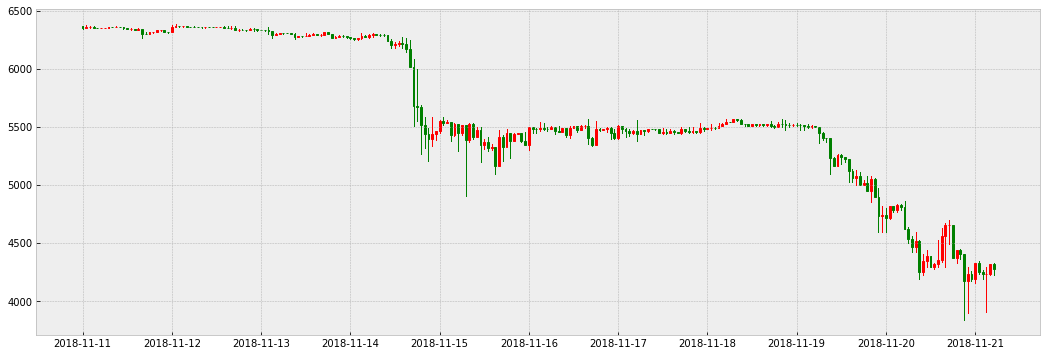

In [12]:
from qsPlot import ohlc_plot
plt.style.use('bmh')


fig, ax = plt.subplots(figsize=(18,6))
ohlc_plot(ax, df_market, t_='DATE', width_=0.5, n_=24)

In [13]:
df_Exec_Trade_Buy = df_exec.query('execType == "Trade" & side=="Buy"')
df_Exec_Trade_Sell = df_exec.query('execType == "Trade" & side=="Sell"')

df_Exec_New = df_exec.query('execType == "New"')
df_Exec_Canceled = df_exec.query('execType == "Canceled"')

print('Buy: %d'% len(df_Exec_Trade_Buy))
print('Sell: %d'% len(df_Exec_Trade_Sell))
print('New: %d' % len(df_Exec_New))
print('Canceled: %d' % len(df_Exec_Canceled))

Buy: 220
Sell: 194
New: 0
Canceled: 0


In [23]:
df_Order_Buy = df_order.query('side == "Buy"')
df_Order_Sell = df_order.query('side == "Sell"')

print('Order_Buy: %s' % len(df_Order_Buy))
print('Order_Sell: %s' % len(df_Order_Sell))
print('Order time range: %s' % (df_order.DATETIME.values[[0, -1]]))

Order_Buy: 102
Order_Sell: 57
Order time range: ['2018-11-11T04:00:00.000000000' '2018-11-18T12:00:00.000000000']


<Container object of 194 artists>

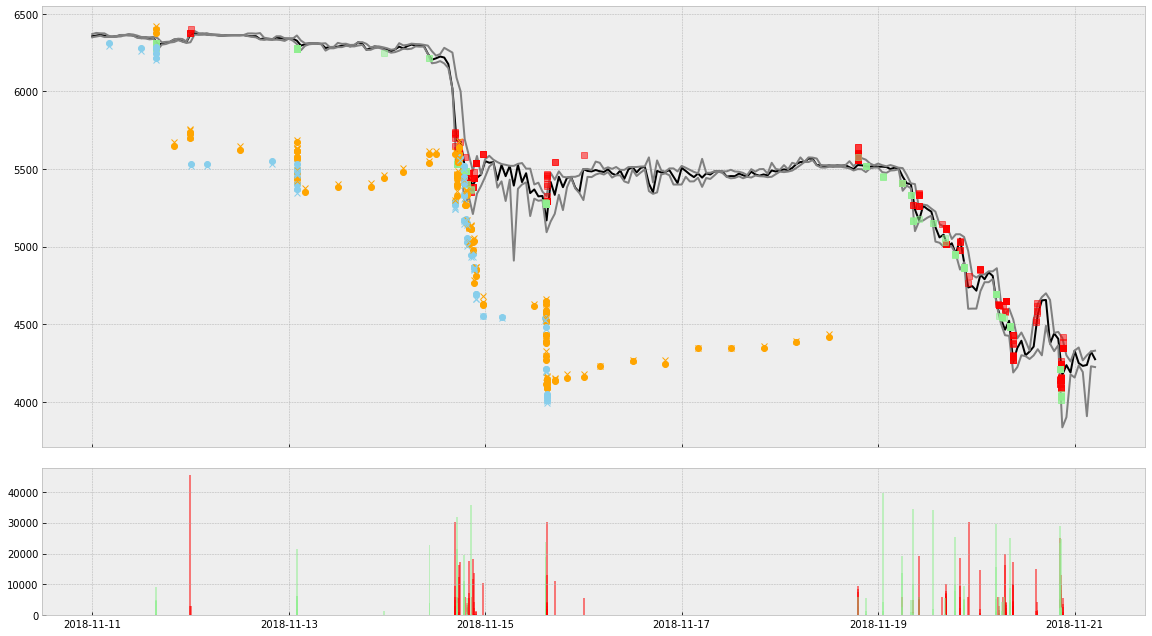

In [17]:
fig,axs = plt.subplots(2, 1, sharex=True, figsize=(16, 9), gridspec_kw = {'height_ratios':[3, 1]})
fig.tight_layout()

ax = axs[0]

# marketprice
ax.plot(df_market.DATETIME, df_market.close, color='k')
ax.plot(df_market.DATETIME, df_market.high, color='grey')
ax.plot(df_market.DATETIME, df_market.low, color='grey')

# execution
ax.plot(df_Exec_Trade_Buy.DATETIME, df_Exec_Trade_Buy['lastPx'], 's', color='red', alpha=0.5)
ax.plot(df_Exec_Trade_Sell.DATETIME, df_Exec_Trade_Sell['lastPx'], 's', color='lightgreen', alpha=0.5)
#ax.plot(df_Exec_New.DATETIME, df_Exec_New['price'], 'o', color='blue')
#ax.plot(df_Exec_Canceled.DATETIME, df_Exec_Canceled['price'], '*', color='blue')

# order
ax.plot(df_Order_Buy.DATETIME, df_Order_Buy['avgPx'], 'o', color='orange')
ax.plot(df_Order_Sell.DATETIME, df_Order_Sell['avgPx'], 'o', color='skyblue')
ax.plot(df_Order_Buy.DATETIME, df_Order_Buy['price'], 'x', color='orange')
ax.plot(df_Order_Sell.DATETIME, df_Order_Sell['price'], 'x', color='skyblue')

from matplotlib.dates import DateFormatter

ax.xaxis.set_major_formatter(DateFormatter('%b%d %H:%M:%S'))
#_=plt.xticks(rotation=45)
#_=ax.set_title('%s, %s, %s ~ %s, %s' % (acc.account, symbol, startTime, endTime, bar_type))

ax2 = axs[1]
ax2.bar(df_Exec_Trade_Buy.DATETIME, df_Exec_Trade_Buy['lastQty'], width=0.02, color='red', alpha=0.5)
ax2.bar(df_Exec_Trade_Sell.DATETIME, df_Exec_Trade_Sell['lastQty'], width=0.02, color='lightgreen', alpha=0.5)

关于 REST \order 的几个结论

1. 历史数据只有**已完成订单**的记录。
    - ordStatus只有Filled， 之前已经发现，New和Canceled过几分钟之后就会消失。
    - all(workingIndicator == False)
    - all(leavesQty == 0)
    - all(cumQty == orderQty)
2. 一行一个OrderID

**上图中order和execution似乎对不上？**

In [57]:
df_order.ordStatus.unique()   # [Filled]
df_order.workingIndicator.unique()  # [False]
df_order.leavesQty.unique()   # [0]
all(df_order.cumQty == df_order.orderQty)  # True

len(df_order.orderID.unique()) == len(df_order)   # True

df_order.ordType.unique()  # [Limit]
df_order.side.unique()  # [Buy, Sell]

df_order.columns

Index(['account', 'avgPx', 'clOrdID', 'clOrdLinkID', 'contingencyType',
       'cumQty', 'currency', 'displayQty', 'exDestination', 'execInst',
       'leavesQty', 'multiLegReportingType', 'ordRejReason', 'ordStatus',
       'ordType', 'orderID', 'orderQty', 'pegOffsetValue', 'pegPriceType',
       'price', 'settlCurrency', 'side', 'simpleCumQty', 'simpleLeavesQty',
       'simpleOrderQty', 'stopPx', 'symbol', 'text', 'timeInForce',
       'timestamp', 'transactTime', 'triggered', 'workingIndicator',
       'DATETIME'],
      dtype='object')